# [Finance] Technical Analysis and Machine Learning

In this self-initiated project, we will be exploring the application of data science in finance, which has been one of the hottest topics in the recent years. The promise of being able to predict the future is definitely alluring.

This project will be split into 4 parts, namely:

- Usage of APIs to collect finance data
- Performing exploratory data analysis
- Implementation of technical financial anaysis
- Training a machine learning model to predict stock prices


## Acknowledgments:

I would like to express my thanks to [UpLevel](https://dataprojects.uplevel.work/) team for listing this assignment on their catalog, which I was deeply interested in. The UpLevel team provided a good framework for embarking on this end-to-end project, and I have repurposed the content into my independently published notebook as shown here.

<strong>The notebook documented below is intended to be used as follow-along for learners who are interested in combining data science with finance, in similar fashion to how UpLevel first premised the assignment.</strong>

## Disclaimer:

<small>I am not a finance professional, and this exercise is purely for educational purposes. The material provided in this notebook should be used for informational purposes only and in no way should be relied upon for financial advice. This project is not liable for any errors, omissions, or any losses, injuries, or damages arising from its display or use. All information is provided as is with no warranties, and confers no rights. Please be sure to consult your own financial advisor when making decisions regarding your financial management. The ideas and strategies mentioned in this blog should never be used without first assessing your own personal and financial situation, or without consulting a financial professional.

## Part I: Usage of APIs to collect financial data

###  Step 1. Import libraries

- pandas
- requests

In [1]:
import pandas as pd
import requests

### Step 2. Obtain API key for Financial Data

We will be using [Alpha Vantage](https://www.alphavantage.co/), which is a reliable source for receiving live feed of financial data. We will be able to claim an API key by following the steps [here](https://www.alphavantage.co/support/#api-key), making sure to note the API call limits per day.

Once we have understood what Alpha Vantage does, we will be declare a variable and store our key obtained in this variable.

In [2]:
# Declare our variable here and assign the key you got as a string
# API key shown below is not the actual key, it has been edited after execution for security purposes before sharing on Github

apikey='privateAPIkeygoeshere'

### Step 3: Read the Alphavantage documentation

As a measure of good practice, we will spend some time to read through the [API documentation](https://www.alphavantage.co/documentation/) by Alpha Vantage.

For this project, we will be using the TIME_SERIES_DAILY Stock API for our dataset. After understanding what is going on in the URL examples by Alpha Vantage, we learnt that the output can be set as [JSON](https://en.wikipedia.org/wiki/JSON). This is useful as we will encounter many APIs and it's important to know how to dissect each API to make our calls.

After ensuring that the example URLs under JSON contain the full dataset (data goes beyond 2020), we can proceed to the next step.

### Step 4: Make your API call

We will be looking at a Singapore-based company named <strong>Singapore Post Limited  (ticker symbol SPSTF)</strong> and we'll retrieve that data using Alphavantage API. It's not an actively traded company, but it's still a good example to look at.

We will make an API call to the demo API url, replacing the API key with our own, and ticker symbol with our ETF ticker.
We will then examine the JSON output of the response.

In [3]:
# Make our GET request here and assign the results to a variable

url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=SPSTF&outputsize=full&apikey=privateAPIkeygoeshere'
response = requests.get(url)
print(response.json())

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'SPSTF', '3. Last Refreshed': '2021-03-12', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2021-03-12': {'1. open': '0.5058', '2. high': '0.5058', '3. low': '0.5058', '4. close': '0.5058', '5. volume': '0'}, '2021-03-11': {'1. open': '0.5058', '2. high': '0.5058', '3. low': '0.5058', '4. close': '0.5058', '5. volume': '4000'}, '2021-03-10': {'1. open': '0.5150', '2. high': '0.5150', '3. low': '0.5150', '4. close': '0.5150', '5. volume': '0'}, '2021-03-09': {'1. open': '0.5150', '2. high': '0.5150', '3. low': '0.5150', '4. close': '0.5150', '5. volume': '0'}, '2021-03-08': {'1. open': '0.5150', '2. high': '0.5150', '3. low': '0.5150', '4. close': '0.5150', '5. volume': '0'}, '2021-03-05': {'1. open': '0.5150', '2. high': '0.5150', '3. low': '0.5150', '4. close': '0.5150', '5. volume': '780'}, '2021-03-04': {'1. open': '0.5342', '2. high': '0.5342', '

In [4]:
# Measure the length of our JSON/dictionary
print("Length : %d" % len(response.json()))
print("Length of Time Series : %d" % len(response.json()['Time Series (Daily)']))

Length : 2
Length of Time Series : 3418


In [5]:
# Declare a new variable and assign the second item - our Time Series (Daily) - in our JSON to it
timeseries = response.json()['Time Series (Daily)']

### Step 5: Transform JSON file into a useable DataFrame

Now that we have the time series data, we will turn this dictionary into a DataFrame.

In [6]:
pd.DataFrame.from_dict(timeseries)

2021-03-12 2021-03-11 2021-03-10 2021-03-09 2021-03-08 2021-03-05  \
1. open       0.5058     0.5058     0.5150     0.5150     0.5150     0.5150   
2. high       0.5058     0.5058     0.5150     0.5150     0.5150     0.5150   
3. low        0.5058     0.5058     0.5150     0.5150     0.5150     0.5150   
4. close      0.5058     0.5058     0.5150     0.5150     0.5150     0.5150   
5. volume          0       4000          0          0          0        780   

          2021-03-04 2021-03-03 2021-03-02 2021-03-01  ... 2007-07-26  \
1. open       0.5342     0.5342     0.5342     0.5342  ...     0.7900   
2. high       0.5342     0.5342     0.5342     0.5342  ...     0.7900   
3. low        0.5342     0.5342     0.5342     0.5342  ...     0.7900   
4. close      0.5342     0.5342     0.5342     0.5342  ...     0.7900   
5. volume          0          0          0          0  ...          0   

          2007-07-25 2007-07-24 2007-07-23 2007-07-20 2007-07-19 2007-07-18  \
1. open       0.7900     0.7900     0.7900     0.7900     0.7900     0.8000   
2. high       0.7900     0.7900     0.7900     0.7900     0.7900     0.8000   
3. low        0.7900     0.7900     0.7900     0.7900     0.7900     0.8000   
4. close      0.7900     0.7900     0.7900     0.7900     0.7900     0.8000   
5. volume          0          0          0          0      11000          0   

          2007-07-17 2007-07-16 2007-07-13  
1. open       0.8000     0.8000     0.8000  
2. high       0.8000     0.8000     0.8000  
3. low        0.8000     0.8000     0.8000  
4. close      0.8000     0.8000     0.8000  
5. volume          0          0       5000  

[5 rows x 3418 columns]

Our DataFrame looks quite weird and it's going to be hard working with the data in its current form.
Thus we need to do a transpose on the matrix.

In [7]:
# Flip dataframe rows and columns

df = pd.DataFrame.from_dict(timeseries).transpose()
print(df)

           1. open 2. high  3. low 4. close 5. volume
2021-03-12  0.5058  0.5058  0.5058   0.5058         0
2021-03-11  0.5058  0.5058  0.5058   0.5058      4000
2021-03-10  0.5150  0.5150  0.5150   0.5150         0
2021-03-09  0.5150  0.5150  0.5150   0.5150         0
2021-03-08  0.5150  0.5150  0.5150   0.5150         0
...            ...     ...     ...      ...       ...
2007-07-19  0.7900  0.7900  0.7900   0.7900     11000
2007-07-18  0.8000  0.8000  0.8000   0.8000         0
2007-07-17  0.8000  0.8000  0.8000   0.8000         0
2007-07-16  0.8000  0.8000  0.8000   0.8000         0
2007-07-13  0.8000  0.8000  0.8000   0.8000      5000

[3418 rows x 5 columns]


### Step 6: Export our DataFrame as a CSV

As a checkpoint, after successfully calling an API, retrieving the data, and shaping into a proper DataFrame, we now export it as a CSV before carrying on with Part II.

In [8]:
df.to_csv('timeseries.csv')

# Part II: Exploratory Data Analysis (EDA)

Before we dive into any form of analysis, it's important to make sure that the data that you're working with is <strong>clean, organized, and sound</strong>. 

It's also important to explore the data we have using visualization tools to identify any possible inherent patterns.

In this part, we will:
1. Examine the quality and integrity of the data
2. Visualize prices over time
3. Engineer new features
4. Perform more visualization

### Step 1: Import the following libraries
- matplotlib.pyplot as plt
- seaborn

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load our CSV from Part I into a DataFrame
Let's make sure the first column of our CSV becomes the index to match how it looked like when you had the DataFrame from Part I.

In [10]:
# Read our CSV with pandas
# index_col = 0 to turn first column into index

df = pd.read_csv('timeseries.csv', index_col =0)
df.head()

1. open  2. high  3. low  4. close  5. volume
2021-03-12   0.5058   0.5058  0.5058    0.5058          0
2021-03-11   0.5058   0.5058  0.5058    0.5058       4000
2021-03-10   0.5150   0.5150  0.5150    0.5150          0
2021-03-09   0.5150   0.5150  0.5150    0.5150          0
2021-03-08   0.5150   0.5150  0.5150    0.5150          0

### Step 3: Do preliminary checks on data quality in our DataFrame

We want to make sure that there is no missing data in the dataset, by checking for total of NA data in our DataFrame columns.
Alternatively, it may be useful to just get the sum of the nulls in each column. 

In [11]:
# Check for missing data in columns in DataFrame

df.isnull()

1. open  2. high  3. low  4. close  5. volume
2021-03-12    False    False   False     False      False
2021-03-11    False    False   False     False      False
2021-03-10    False    False   False     False      False
2021-03-09    False    False   False     False      False
2021-03-08    False    False   False     False      False
...             ...      ...     ...       ...        ...
2007-07-19    False    False   False     False      False
2007-07-18    False    False   False     False      False
2007-07-17    False    False   False     False      False
2007-07-16    False    False   False     False      False
2007-07-13    False    False   False     False      False

[3418 rows x 5 columns]

In [12]:
df.isnull().sum()

1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64

We also want to check our DataFrame's Index data type.

The reason for checking is because we'll be slicing the DataFrame later based on the date in the index, and we need to make sure that it's a <strong>DateTime</strong> object.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3418 entries, 2021-03-12 to 2007-07-13
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    3418 non-null   float64
 1   2. high    3418 non-null   float64
 2   3. low     3418 non-null   float64
 3   4. close   3418 non-null   float64
 4   5. volume  3418 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 160.2+ KB


### Step 4: Perform data transformations to get our DataFrame into the ideal working format

Since we do not have <strong>DateTime</strong> as our type, we will do the conversion as necessary.

In [14]:
# Convert our index into a DateTime
df.index = pd.to_datetime(df.index)

In [15]:
# Check our index's type again
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3418 entries, 2021-03-12 to 2007-07-13
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    3418 non-null   float64
 1   2. high    3418 non-null   float64
 2   3. low     3418 non-null   float64
 3   4. close   3418 non-null   float64
 4   5. volume  3418 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 160.2 KB


### Step 5: Plot our columns' data in DataFrame

There are many ways to do this, but since we have a DateTimeIndex, we will just use the DataFrame's method to plot the five columns in the same plot. 

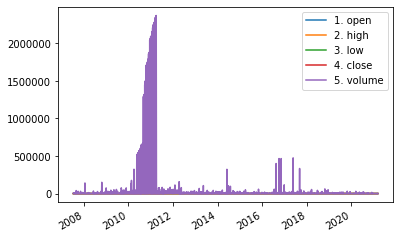

In [16]:
df.plot()

Looks like we can't see much, because we accidentally plotted "5. volume" which is many orders higher than the other four columns.

Thus we will drop the "5. volume" column and replot the rest of the DataFrame, but not overwriting our original DataFrame.

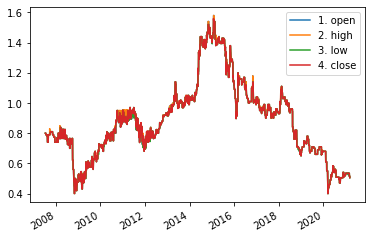

In [17]:
# Drop "5. volume" and store the new DataFrame in a new variable, then plot the rest of the columns

df_dropvol = df.drop(['5. volume'], axis=1)
df_dropvol.plot()

### Step 6: Engineer new features

Now that we've visualized the prices, it would also be good to see if there are any direct seasonal variations in the price.

We will do this by extract more information out of our dates, by separating them into data elements like the month, the day, and the day of the week.

Since our DataFrame index is now a DateTime object, we can actually use existing library methods to easily retrieve those information.

We will be extracting:

1. Day of the week (0-6, 0 = Monday, 6 = Sunday)
2. Month (1-12, 1 = January, 12 = December)
3. Day of the month (1-31)

In [18]:
import datetime
df['date'] = df.index

# Create a UDF to help us with the datetime element extraction

def dt_convert(x,dt):
    if dt == 'day':
        return x.isoweekday()
    elif dt == 'day_of_month':
        return x.day
    elif dt == 'month':
        return x.month

# Get the day of week and store it in a new column

df['day'] = df['date'].apply(dt_convert, dt='day')
df

1. open  2. high  3. low  4. close  5. volume       date  day
2021-03-12   0.5058   0.5058  0.5058    0.5058          0 2021-03-12    5
2021-03-11   0.5058   0.5058  0.5058    0.5058       4000 2021-03-11    4
2021-03-10   0.5150   0.5150  0.5150    0.5150          0 2021-03-10    3
2021-03-09   0.5150   0.5150  0.5150    0.5150          0 2021-03-09    2
2021-03-08   0.5150   0.5150  0.5150    0.5150          0 2021-03-08    1
...             ...      ...     ...       ...        ...        ...  ...
2007-07-19   0.7900   0.7900  0.7900    0.7900      11000 2007-07-19    4
2007-07-18   0.8000   0.8000  0.8000    0.8000          0 2007-07-18    3
2007-07-17   0.8000   0.8000  0.8000    0.8000          0 2007-07-17    2
2007-07-16   0.8000   0.8000  0.8000    0.8000          0 2007-07-16    1
2007-07-13   0.8000   0.8000  0.8000    0.8000       5000 2007-07-13    5

[3418 rows x 7 columns]

In [19]:
# Get the day of the month and store it in a new column

df['day_of_month'] = df['date'].apply(dt_convert, dt='day_of_month')
df

1. open  2. high  3. low  4. close  5. volume       date  day  \
2021-03-12   0.5058   0.5058  0.5058    0.5058          0 2021-03-12    5   
2021-03-11   0.5058   0.5058  0.5058    0.5058       4000 2021-03-11    4   
2021-03-10   0.5150   0.5150  0.5150    0.5150          0 2021-03-10    3   
2021-03-09   0.5150   0.5150  0.5150    0.5150          0 2021-03-09    2   
2021-03-08   0.5150   0.5150  0.5150    0.5150          0 2021-03-08    1   
...             ...      ...     ...       ...        ...        ...  ...   
2007-07-19   0.7900   0.7900  0.7900    0.7900      11000 2007-07-19    4   
2007-07-18   0.8000   0.8000  0.8000    0.8000          0 2007-07-18    3   
2007-07-17   0.8000   0.8000  0.8000    0.8000          0 2007-07-17    2   
2007-07-16   0.8000   0.8000  0.8000    0.8000          0 2007-07-16    1   
2007-07-13   0.8000   0.8000  0.8000    0.8000       5000 2007-07-13    5   

            day_of_month  
2021-03-12            12  
2021-03-11            11  
2021-03-10            10  
2021-03-09             9  
2021-03-08             8  
...                  ...  
2007-07-19            19  
2007-07-18            18  
2007-07-17            17  
2007-07-16            16  
2007-07-13            13  

[3418 rows x 8 columns]

In [20]:
# Get the month and store it in a new column

df['month'] = df['date'].apply(dt_convert, dt='month')
df.drop('date', axis=1, inplace=True)
df

1. open  2. high  3. low  4. close  5. volume  day  day_of_month  \
2021-03-12   0.5058   0.5058  0.5058    0.5058          0    5            12   
2021-03-11   0.5058   0.5058  0.5058    0.5058       4000    4            11   
2021-03-10   0.5150   0.5150  0.5150    0.5150          0    3            10   
2021-03-09   0.5150   0.5150  0.5150    0.5150          0    2             9   
2021-03-08   0.5150   0.5150  0.5150    0.5150          0    1             8   
...             ...      ...     ...       ...        ...  ...           ...   
2007-07-19   0.7900   0.7900  0.7900    0.7900      11000    4            19   
2007-07-18   0.8000   0.8000  0.8000    0.8000          0    3            18   
2007-07-17   0.8000   0.8000  0.8000    0.8000          0    2            17   
2007-07-16   0.8000   0.8000  0.8000    0.8000          0    1            16   
2007-07-13   0.8000   0.8000  0.8000    0.8000       5000    5            13   

            month  
2021-03-12      3  
2021-03-11      3  
2021-03-10      3  
2021-03-09      3  
2021-03-08      3  
...           ...  
2007-07-19      7  
2007-07-18      7  
2007-07-17      7  
2007-07-16      7  
2007-07-13      7  

[3418 rows x 8 columns]

### Step 7: Visualize the closing price by day, day of week, and month

Now that we have the new features extracted from the date, we can perform more visualization to identify additional patterns, if any.

We will be using boxplots to visualize the close price. More info here: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

[Text(0, 0, '$0.20'),
 Text(0, 0, '$0.40'),
 Text(0, 0, '$0.60'),
 Text(0, 0, '$0.80'),
 Text(0, 0, '$1.00'),
 Text(0, 0, '$1.20'),
 Text(0, 0, '$1.40'),
 Text(0, 0, '$1.60'),
 Text(0, 0, '$1.80')]

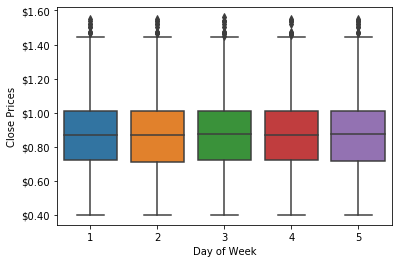

In [21]:
# Plot boxplots of close prices, separated by day of week 

chartdow = sns.boxplot(x='day', y='4. close', data=df)
chartdow.set(xlabel="Day of Week", ylabel = "Close Prices")

ylabels = ['$' + '{:,.2f}'.format(y) for y in chartdow.get_yticks()]
chartdow.set_yticklabels(ylabels)

[Text(0, 0, '$0.20'),
 Text(0, 0, '$0.40'),
 Text(0, 0, '$0.60'),
 Text(0, 0, '$0.80'),
 Text(0, 0, '$1.00'),
 Text(0, 0, '$1.20'),
 Text(0, 0, '$1.40'),
 Text(0, 0, '$1.60'),
 Text(0, 0, '$1.80')]

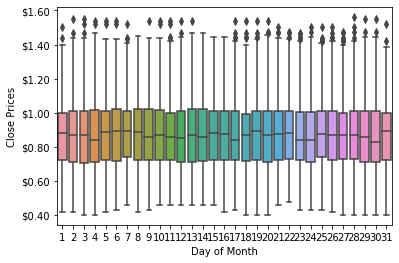

In [22]:
# Plot boxplots of close prices, separated by day of month

chartdom = sns.boxplot(x='day_of_month', y='4. close', data=df)
chartdom.set(xlabel="Day of Month", ylabel = "Close Prices")

ylabels = ['$' + '{:,.2f}'.format(y) for y in chartdom.get_yticks()]
chartdom.set_yticklabels(ylabels)

[Text(0, 0, '$0.20'),
 Text(0, 0, '$0.40'),
 Text(0, 0, '$0.60'),
 Text(0, 0, '$0.80'),
 Text(0, 0, '$1.00'),
 Text(0, 0, '$1.20'),
 Text(0, 0, '$1.40'),
 Text(0, 0, '$1.60'),
 Text(0, 0, '$1.80')]

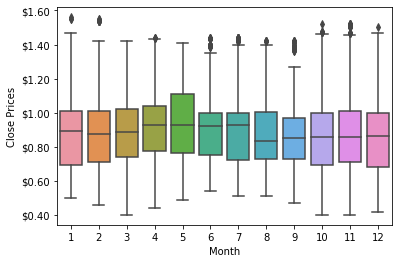

In [23]:
# Plot boxplots of close prices, separated by month

chartm = sns.boxplot(x='month', y='4. close', data=df)
chartm.set(xlabel="Month", ylabel = "Close Prices")

ylabels = ['$' + '{:,.2f}'.format(y) for y in chartm.get_yticks()]
chartm.set_yticklabels(ylabels)

Looks like there doesn't seem to be any wild seasonal variation in the dataset, i.e., the boxplots don't differ too much in height.

### Step 8: Export our DataFrame as a CSV

To conclude this second part of the project, we will be exporting our dataset to CSV once again, with our newly engineered features included.

In [24]:
# Export our CSV (use a different filename vs exported from Part I)
df.to_csv('timeseriesv2.csv')

## Part III: Basic Technical Analysis

In Part I, we collected data. In Part II, we did some simple data visualizations after attempting to clean the data (but the data was already quite clean).

In this Part III, we will embark on performing simple technical analyses that algorithimic traders perform. 


### Step 1: Read our CSV from Part II

This time, we will be smarter about it and change the index into a proper DateTime object the moment we read our CSV.

In [25]:
# Read our CSV from Part II and make sure index is parsed as a date

from datetime import datetime
df = pd.read_csv('timeseriesv2.csv', index_col =0)
df.index = pd.to_datetime(df.index)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3418 entries, 2021-03-12 to 2007-07-13
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1. open       3418 non-null   float64
 1   2. high       3418 non-null   float64
 2   3. low        3418 non-null   float64
 3   4. close      3418 non-null   float64
 4   5. volume     3418 non-null   int64  
 5   day           3418 non-null   int64  
 6   day_of_month  3418 non-null   int64  
 7   month         3418 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 240.3 KB


### Step 2: Slice our DataFrame to cover only 2009-2019 

The prices in 2020 will not be reliable, since we have the unexpected event that is COVID-19 which has done very bad things to the economy.

As such, let's just look at the past ten years of data, i.e. from 2009-01-01 to 2019-01-01. Since our index is already a DateTime object, you can <strong>slice</strong> them using strings.

In [26]:
# Slice your DataFrame by indexing the dates

df = df['2019-01-01' :'2009-01-01']
df

1. open  2. high  3. low  4. close  5. volume  day  day_of_month  \
2018-12-27    0.660    0.660    0.66      0.66          0    4            27   
2018-12-26    0.660    0.660    0.66      0.66          0    3            26   
2018-12-24    0.660    0.660    0.66      0.66          0    1            24   
2018-12-21    0.660    0.660    0.66      0.66          0    5            21   
2018-12-20    0.660    0.660    0.66      0.66          0    4            20   
...             ...      ...     ...       ...        ...  ...           ...   
2009-01-08    0.530    0.530    0.53      0.53      12000    4             8   
2009-01-07    0.525    0.525    0.52      0.52          0    3             7   
2009-01-06    0.525    0.525    0.52      0.52          0    2             6   
2009-01-05    0.525    0.525    0.52      0.52          0    1             5   
2009-01-02    0.525    0.525    0.52      0.52          0    5             2   

            month  
2018-12-27     12  
2018-12-26     12  
2018-12-24     12  
2018-12-21     12  
2018-12-20     12  
...           ...  
2009-01-08      1  
2009-01-07      1  
2009-01-06      1  
2009-01-05      1  
2009-01-02      1  

[2510 rows x 8 columns]

In [27]:
# Sort DataFrame's index to get in a chronological order

df = df.sort_index()
df

1. open  2. high  3. low  4. close  5. volume  day  day_of_month  \
2009-01-02    0.525    0.525    0.52      0.52          0    5             2   
2009-01-05    0.525    0.525    0.52      0.52          0    1             5   
2009-01-06    0.525    0.525    0.52      0.52          0    2             6   
2009-01-07    0.525    0.525    0.52      0.52          0    3             7   
2009-01-08    0.530    0.530    0.53      0.53      12000    4             8   
...             ...      ...     ...       ...        ...  ...           ...   
2018-12-20    0.660    0.660    0.66      0.66          0    4            20   
2018-12-21    0.660    0.660    0.66      0.66          0    5            21   
2018-12-24    0.660    0.660    0.66      0.66          0    1            24   
2018-12-26    0.660    0.660    0.66      0.66          0    3            26   
2018-12-27    0.660    0.660    0.66      0.66          0    4            27   

            month  
2009-01-02      1  
2009-01-05      1  
2009-01-06      1  
2009-01-07      1  
2009-01-08      1  
...           ...  
2018-12-20     12  
2018-12-21     12  
2018-12-24     12  
2018-12-26     12  
2018-12-27     12  

[2510 rows x 8 columns]

### Step 3: Calculate the interday percentage change in close price

Now for our first analysis - calculating the interday percentage change in close price. We do this to see how the prices change over time in terms of percentages. 

Here's an example to illustrate interday percentage change in close price.

<img src="https://github.com/wtmx/finance-uplevel/blob/master/InterdayPercentageChange.png?raw=true">

In [28]:
#  Create a new column that contains the interday percentage change
# Use pandas' own method to obtain interday percentage change

df['interday_close_percent'] = df['4. close'].pct_change()
df

1. open  2. high  3. low  4. close  5. volume  day  day_of_month  \
2009-01-02    0.525    0.525    0.52      0.52          0    5             2   
2009-01-05    0.525    0.525    0.52      0.52          0    1             5   
2009-01-06    0.525    0.525    0.52      0.52          0    2             6   
2009-01-07    0.525    0.525    0.52      0.52          0    3             7   
2009-01-08    0.530    0.530    0.53      0.53      12000    4             8   
...             ...      ...     ...       ...        ...  ...           ...   
2018-12-20    0.660    0.660    0.66      0.66          0    4            20   
2018-12-21    0.660    0.660    0.66      0.66          0    5            21   
2018-12-24    0.660    0.660    0.66      0.66          0    1            24   
2018-12-26    0.660    0.660    0.66      0.66          0    3            26   
2018-12-27    0.660    0.660    0.66      0.66          0    4            27   

            month  interday_close_percent  
2009-01-02      1                     NaN  
2009-01-05      1                0.000000  
2009-01-06      1                0.000000  
2009-01-07      1                0.000000  
2009-01-08      1                0.019231  
...           ...                     ...  
2018-12-20     12                0.000000  
2018-12-21     12                0.000000  
2018-12-24     12                0.000000  
2018-12-26     12                0.000000  
2018-12-27     12                0.000000  

[2510 rows x 9 columns]

### Step 4: Implement a buy-and-hold strategy

An underrated strategy, and sometimes said to outperform many other strategies, the buy-and-hold strategy is exactly what it sounds like - we buy-and-hold onto the stocks without doing anything.

It's also the easiest to calculate for, so we will use this as a warm-up to get started. 

Here is the scenario - we buy 100 units on 2009-01-02, and hold onto it until 2019-01-01. How much is our 100 units worth at the end? Create a new column called "portfolio_hold" that contains the value of our 100 units at any point in time.

There are two ways to do this to populate the 'portofolio_hold' column:
1. (Easy) Multiple each value in "4. close" column by 100
2. (Hard) Write your own code such to loop through the 'interday_close_percentage' column and iteratively multiply your portfolio's value each day

Since we are tryhards, we will just attempt both methods.
The Hard Mode will also allow us to exercise our iterative thinking and make us better coders.

In [29]:
# (Easy Mode): Implement a buy-and-hold strategy to illustrate how much money you'll have in 2019
# Create a column which contains 100 * 4.close 

df['portfolio_hold'] = df['4. close']*100
df

1. open  2. high  3. low  4. close  5. volume  day  day_of_month  \
2009-01-02    0.525    0.525    0.52      0.52          0    5             2   
2009-01-05    0.525    0.525    0.52      0.52          0    1             5   
2009-01-06    0.525    0.525    0.52      0.52          0    2             6   
2009-01-07    0.525    0.525    0.52      0.52          0    3             7   
2009-01-08    0.530    0.530    0.53      0.53      12000    4             8   
...             ...      ...     ...       ...        ...  ...           ...   
2018-12-20    0.660    0.660    0.66      0.66          0    4            20   
2018-12-21    0.660    0.660    0.66      0.66          0    5            21   
2018-12-24    0.660    0.660    0.66      0.66          0    1            24   
2018-12-26    0.660    0.660    0.66      0.66          0    3            26   
2018-12-27    0.660    0.660    0.66      0.66          0    4            27   

            month  interday_close_percent  portfolio_hold  
2009-01-02      1                     NaN            52.0  
2009-01-05      1                0.000000            52.0  
2009-01-06      1                0.000000            52.0  
2009-01-07      1                0.000000            52.0  
2009-01-08      1                0.019231            53.0  
...           ...                     ...             ...  
2018-12-20     12                0.000000            66.0  
2018-12-21     12                0.000000            66.0  
2018-12-24     12                0.000000            66.0  
2018-12-26     12                0.000000            66.0  
2018-12-27     12                0.000000            66.0  

[2510 rows x 10 columns]

In [30]:
# (Hard Mode)

# declare a variable, and store the value of close on 2009-01-02 (1.9345) multiplied by 100 units

close = df.iloc[0,3] * 100

# declare an empty list

amt_list = []

# append the variable into the empty list - this is your portfolio amount on Day 1

amt_list.append(close)

# initialize a for loop for the 'interday_close_percent' column, from the second row of our DataFrame onwards
# this is because we've appended the value of the first day into your list already

for i, r in df.iloc[1:].iterrows():
    # update our value first with the interday_close_percent that corresponds to that day
    close = (1 + r[8]) * close
    # append the updated value into the list
    amt_list.append(close)

# assign the list into our dataframe as a new column
df['portfolio_hold'] = amt_list
df

1. open  2. high  3. low  4. close  5. volume  day  day_of_month  \
2009-01-02    0.525    0.525    0.52      0.52          0    5             2   
2009-01-05    0.525    0.525    0.52      0.52          0    1             5   
2009-01-06    0.525    0.525    0.52      0.52          0    2             6   
2009-01-07    0.525    0.525    0.52      0.52          0    3             7   
2009-01-08    0.530    0.530    0.53      0.53      12000    4             8   
...             ...      ...     ...       ...        ...  ...           ...   
2018-12-20    0.660    0.660    0.66      0.66          0    4            20   
2018-12-21    0.660    0.660    0.66      0.66          0    5            21   
2018-12-24    0.660    0.660    0.66      0.66          0    1            24   
2018-12-26    0.660    0.660    0.66      0.66          0    3            26   
2018-12-27    0.660    0.660    0.66      0.66          0    4            27   

            month  interday_close_percent  portfolio_hold  
2009-01-02      1                     NaN            52.0  
2009-01-05      1                0.000000            52.0  
2009-01-06      1                0.000000            52.0  
2009-01-07      1                0.000000            52.0  
2009-01-08      1                0.019231            53.0  
...           ...                     ...             ...  
2018-12-20     12                0.000000            66.0  
2018-12-21     12                0.000000            66.0  
2018-12-24     12                0.000000            66.0  
2018-12-26     12                0.000000            66.0  
2018-12-27     12                0.000000            66.0  

[2510 rows x 10 columns]

Here, we'll notice that buy-and-hold strategy works pretty well in this case since our portfolio value went up around 26.9%. 

It is quite a significant percentage for not doing anything.

### Step 5: Implement a Simple Moving Average (SMA) strategy

Next, we will implement a simple moving average analysis, which is one of the oldest technical analysis techniques. It's almost like a Hello World. In a nutshell, the SMA will tell us when to invest and when to sell.

In a simple moving average, we define a time window, where we calculate the arithemtic mean of those prices. We'll share more on why we need to calculate the SMA, but let's get acquainted with the maths first.

For example, in a 3-day rolling window SMA, we start with Day 3, and sum up Days 1-3 followed by averaging them. On Day 4, we will take prices from Days 2-4. followed by averaging these values. This continues all the way to the end of the time series.

More information here: https://www.investopedia.com/terms/s/sma.asp (the video is also useful)

Here is an illustration of how a simple average is calculated across a 3-day window.

<img src="https://github.com/wtmx/finance-uplevel/blob/master/SMAcalculation.png?raw=true">

Now, we will create a column containing a <strong>50-day rolling window of the closing price</strong>.

In [31]:
# Create a column containing a 50-day window SMA
# Use pandas' in-built method

df['close_50'] = df.iloc[:,3].rolling(window=50).mean()
df.head()

1. open  2. high  3. low  4. close  5. volume  day  day_of_month  \
2009-01-02    0.525    0.525    0.52      0.52          0    5             2   
2009-01-05    0.525    0.525    0.52      0.52          0    1             5   
2009-01-06    0.525    0.525    0.52      0.52          0    2             6   
2009-01-07    0.525    0.525    0.52      0.52          0    3             7   
2009-01-08    0.530    0.530    0.53      0.53      12000    4             8   

            month  interday_close_percent  portfolio_hold  close_50  
2009-01-02      1                     NaN            52.0       NaN  
2009-01-05      1                0.000000            52.0       NaN  
2009-01-06      1                0.000000            52.0       NaN  
2009-01-07      1                0.000000            52.0       NaN  
2009-01-08      1                0.019231            53.0       NaN

### Step 6: Plot the 50-day SMA

Now that we've created a column containing the 50-day SMA, it's time to plot it to see how this 50-day SMA differs from our original daily close price.

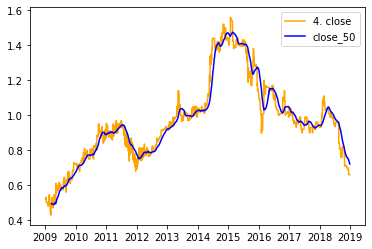

In [32]:
# Plot our close price and 50-day SMA

x = df.index.to_series()
y1 = df['4. close']
y2 = df['close_50']

plt.plot(x, y1, color = 'orange', label  = '4. close')
plt.plot(x, y2, color = 'blue', label  = 'close_50')
plt.legend()

In an SMA, the lines are smoother than the original plot, since the averaging across 50 days reduces fluctuations in the values. This allows us to observe intermediate-term trends.

### Step 7: Plot the 200-day SMA

Now that we're acquianted with implementing an SMA, let's do another SMA, this time at a 200-day window.

The reason why we're doing another SMA is that in a SMA strategy, we buy or sell shares depending on the relative positions of the two SMA lines.

A "cross" occurs when two SMA lines cross each other. A golden cross is considered a bullish signal, i.e. favorable signal, and occurss when a short/intermediate-term SMA rises above the long-term SMA. 

A death cross is considered a bearish signal, i.e. unfavorable signal, when the short/intermediate term SMA drops below the long-term SMA.

In our case, we buy when the 50-day SMA rises above the 200-day SMA and sell when the case is opposite. We fill first create a 200-day SMA, and plot both 50-day and 200-day SMA on the same plot. 

In [33]:
# Create a column containing a 200-day window SMA

df['close_200'] = df.iloc[:,3].rolling(window=200).mean()
df.head()

1. open  2. high  3. low  4. close  5. volume  day  day_of_month  \
2009-01-02    0.525    0.525    0.52      0.52          0    5             2   
2009-01-05    0.525    0.525    0.52      0.52          0    1             5   
2009-01-06    0.525    0.525    0.52      0.52          0    2             6   
2009-01-07    0.525    0.525    0.52      0.52          0    3             7   
2009-01-08    0.530    0.530    0.53      0.53      12000    4             8   

            month  interday_close_percent  portfolio_hold  close_50  close_200  
2009-01-02      1                     NaN            52.0       NaN        NaN  
2009-01-05      1                0.000000            52.0       NaN        NaN  
2009-01-06      1                0.000000            52.0       NaN        NaN  
2009-01-07      1                0.000000            52.0       NaN        NaN  
2009-01-08      1                0.019231            53.0       NaN        NaN

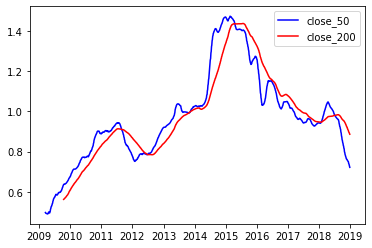

In [34]:
# Plot our 50-day and 200-day SMA

x = df.index.to_series()
y3 = df['close_200']

plt.plot(x, y2, color = 'blue', label  = 'close_50')
plt.plot(x, y3, color = 'red', label  = 'close_200')
plt.legend()

### Step 8: Drop rows containing empty close_50 and close_200

Since the SMA process leaves the first 200 rows without a price in the column with the 200-day SMA, we will not be able to obtain crosses.

As such, declare a new variable and assign it to our DataFrame with <strong>all na dropped</strong>.

We should expect to see a resultant DataFrame as follows:
1. Start date of DataFrame (2009-10-16)
2. End date of DataFrame (2018-12-27)
3. 2311 rows of dates and data and 12 columns
4. A column containing 50-day SMA of "4. close"
5. A column containing 200-day SMA of "4. close"

In [35]:
# Drop all rows containing NA

df = df.dropna(axis = 'index')
df

1. open  2. high  3. low  4. close  5. volume  day  day_of_month  \
2009-10-16     0.65     0.65    0.65      0.65      20000    5            16   
2009-10-19     0.65     0.65    0.65      0.65          0    1            19   
2009-10-20     0.65     0.65    0.65      0.65          0    2            20   
2009-10-21     0.65     0.65    0.65      0.65          0    3            21   
2009-10-22     0.65     0.65    0.65      0.65      16000    4            22   
...             ...      ...     ...       ...        ...  ...           ...   
2018-12-20     0.66     0.66    0.66      0.66          0    4            20   
2018-12-21     0.66     0.66    0.66      0.66          0    5            21   
2018-12-24     0.66     0.66    0.66      0.66          0    1            24   
2018-12-26     0.66     0.66    0.66      0.66          0    3            26   
2018-12-27     0.66     0.66    0.66      0.66          0    4            27   

            month  interday_close_percent  portfolio_hold  close_50  close_200  
2009-10-16     10               -0.029851            65.0  0.635800   0.561600  
2009-10-19     10                0.000000            65.0  0.636400   0.562250  
2009-10-20     10                0.000000            65.0  0.637000   0.562900  
2009-10-21     10                0.000000            65.0  0.637600   0.563550  
2009-10-22     10                0.000000            65.0  0.637700   0.564200  
...           ...                     ...             ...       ...        ...  
2018-12-20     12                0.000000            66.0  0.734112   0.893979  
2018-12-21     12                0.000000            66.0  0.730912   0.891929  
2018-12-24     12                0.000000            66.0  0.727712   0.890079  
2018-12-26     12                0.000000            66.0  0.724512   0.888229  
2018-12-27     12                0.000000            66.0  0.721312   0.886379  

[2311 rows x 12 columns]

### Step 9: Implement a simple SMA crossover strategy

Before we begin, we have to take note of the following complexities:

1. We need to keep track of how many share units we have
2. We need to keep track of how much cash we have
3. If close_50 > close_200, we buy all the shares using cash unless we already have shares then we do nothing
4. If close_200 > close_50, we sell all the shares we have and store cash only unless we have only cash then we do nothing
5. At any point in time, we either have only shares or cash, but never both at the same time

Here is a flowchart of what to consider: 

<img src="https://github.com/wtmx/finance-uplevel/blob/master/SMAStrategyFlowchart.png?raw=true">

In [41]:
# Step 11: Implement a simple SMA crossover strategy (Hard)

# initialize a variable called "shares", and assign 100 to it - this is the number of shares you have at the start
shares = 100

# initialize a variable called "cash", and assign 0 to it - this is how much liquid money you have at the start
cash = 0

# initialize an empty list called "portfolio_sma"
portfolio_sma = []

# initialize an empty list called "cash_list"
cash_list = []

# loop through the DataFrame. Hint: iterrows will be useful here

for index, row in df.iterrows():
    # in a particular row, check if "close_50" is more than "close_200"
    if row['close_50'] > row['close_200']:
        # if "close_50" is more than "close_200", check if "shares" > 0
        if shares > 0:
            # append "shares" * the row's "4. close" price into "portfolio_sma"
            portfolio_sma.append(shares * row['4. close'])
            # append "cash" into "cash_list"
            cash_list.append(cash)
        # else
        else:
            # declare "shares" to be equals to "cash" divided by the row's "4. close"
            shares = cash / row['4. close']
            # declare "cash" to be 0 (because you spent it all buying "shares")
            cash = 0
            # append "shares" * the row's "4. close" price into "portfolio_sma"
            portfolio_sma.append(shares * row['4. close'])
            # append "cash" into "cash_list"
            cash_list.append(cash)
    # else in this case you have "close_200" more than "close_50"
    else:
        # check if you have "shares", i.e. more than 0. Because you have to sell your shares
        if shares > 0:
            # update the value of "cash" to be "shares" multiplied by the row's "4. close"
            cash = shares * row['4. close']
            # update "shares" to be 0 (because you sold all your shares)
            shares = 0
            # append "shares" * the row's "4. close" price into "portfolio_sma"
            portfolio_sma.append(shares * row['4. close'])
            # append "cash" into "cash_list"
            cash_list.append(cash)
        # else
        else:
            # append "shares" * the row's "4. close" price into "portfolio_sma"
            portfolio_sma.append(shares * row['4. close'])
            # append "cash" into "cash_list"
            cash_list.append(cash)

# declare a new column named "portfolio_sma" in your DataFrame which contains "portfolio_sma"
df['portfolio_sma'] = portfolio_sma

# declare a new column named "cash_sma" in your DataFrame which contains "cash_list"
df['cash_list'] = cash_list

# check your DataFrame
df

1. open  2. high  3. low  4. close  5. volume  day  day_of_month  \
2009-10-16     0.65     0.65    0.65      0.65      20000    5            16   
2009-10-19     0.65     0.65    0.65      0.65          0    1            19   
2009-10-20     0.65     0.65    0.65      0.65          0    2            20   
2009-10-21     0.65     0.65    0.65      0.65          0    3            21   
2009-10-22     0.65     0.65    0.65      0.65      16000    4            22   
...             ...      ...     ...       ...        ...  ...           ...   
2018-12-20     0.66     0.66    0.66      0.66          0    4            20   
2018-12-21     0.66     0.66    0.66      0.66          0    5            21   
2018-12-24     0.66     0.66    0.66      0.66          0    1            24   
2018-12-26     0.66     0.66    0.66      0.66          0    3            26   
2018-12-27     0.66     0.66    0.66      0.66          0    4            27   

            month  interday_close_percent  portfolio_hold  close_50  \
2009-10-16     10               -0.029851            65.0  0.635800   
2009-10-19     10                0.000000            65.0  0.636400   
2009-10-20     10                0.000000            65.0  0.637000   
2009-10-21     10                0.000000            65.0  0.637600   
2009-10-22     10                0.000000            65.0  0.637700   
...           ...                     ...             ...       ...   
2018-12-20     12                0.000000            66.0  0.734112   
2018-12-21     12                0.000000            66.0  0.730912   
2018-12-24     12                0.000000            66.0  0.727712   
2018-12-26     12                0.000000            66.0  0.724512   
2018-12-27     12                0.000000            66.0  0.721312   

            close_200  portfolio_sma   cash_list  
2009-10-16   0.561600           65.0    0.000000  
2009-10-19   0.562250           65.0    0.000000  
2009-10-20   0.562900           65.0    0.000000  
2009-10-21   0.563550           65.0    0.000000  
2009-10-22   0.564200           65.0    0.000000  
...               ...            ...         ...  
2018-12-20   0.893979            0.0  133.515472  
2018-12-21   0.891929            0.0  133.515472  
2018-12-24   0.890079            0.0  133.515472  
2018-12-26   0.888229            0.0  133.515472  
2018-12-27   0.886379            0.0  133.515472  

[2311 rows x 14 columns]

Examining the results, if we implemented a buy-and-hold strategy, we start off with 65.0 in your portfolio and end up with 66.0 - that's a whopping 1.54% increase. That's horrible.

On the other hand, if we implement the SMA crossover strategy, we'd end up with 133.52 - <strong>that's a 105.4% increase</strong> instead. We essentially doubled our money in this period.  

Therein lies the power of SMA over holding - it's best suited for stocks where the prices fluctuate. It won't work with all of the stocks, so more analysis has to be performed for different stock tickers.

As a possible follow up, we could also try different combinations of SMAs and see if we can improve your amount at the end of the 10-year period.

But for now, we will be moving on to the last part in this project.

# Part IV: Perform Machine Learning

After collecting our data (Part I), exploratory data analysis (Part II), and fundamental analyses (Part III), we're now ready to train models and get this party started.

<img src="https://github.com/wtmx/finance-uplevel/blob/master/MachineLearningProcess.png?raw=true">

Generally, the machine learning process has five parts:
1. <strong>Split our data into train and test set</strong><br>
2. <strong>Model creation</strong>
<br>
Import our models from sklearn and instantiate them (assign model object to a variable)
3. <strong>Model fitting</strong>
<br>
Fit your training data into the model and train train train
4. <strong>Model prediction</strong>
<br>
Make a set of predictions using your test data, and
5. <strong>Model assessment</strong>
<br>
Compare our predictions with ground truth in test data

### Step 1: Import our libraries

We will be using models from sklearn - a popular machine learning library. However, we won't import everything from sklearn and take just what we need.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

### Step 2: Reuse our file from Part II and take only 2009-01-01 to 2019-01-01

Alternatively, we could drop the columns we don't need for our ML prediction from our part III dataframe.

In [43]:
df = pd.read_csv('timeseriesv2.csv', index_col = 0)
df.index = pd.to_datetime(df.index)
df = df['2019-01-01' :'2009-01-01'].sort_index()
df

1. open  2. high  3. low  4. close  5. volume  day  day_of_month  \
2009-01-02    0.525    0.525    0.52      0.52          0    5             2   
2009-01-05    0.525    0.525    0.52      0.52          0    1             5   
2009-01-06    0.525    0.525    0.52      0.52          0    2             6   
2009-01-07    0.525    0.525    0.52      0.52          0    3             7   
2009-01-08    0.530    0.530    0.53      0.53      12000    4             8   
...             ...      ...     ...       ...        ...  ...           ...   
2018-12-20    0.660    0.660    0.66      0.66          0    4            20   
2018-12-21    0.660    0.660    0.66      0.66          0    5            21   
2018-12-24    0.660    0.660    0.66      0.66          0    1            24   
2018-12-26    0.660    0.660    0.66      0.66          0    3            26   
2018-12-27    0.660    0.660    0.66      0.66          0    4            27   

            month  
2009-01-02      1  
2009-01-05      1  
2009-01-06      1  
2009-01-07      1  
2009-01-08      1  
...           ...  
2018-12-20     12  
2018-12-21     12  
2018-12-24     12  
2018-12-26     12  
2018-12-27     12  

[2510 rows x 8 columns]

### Step 3: Prepare the version of our DataFrame for Machine Learning

We are going to extract more data from the existing columns, more specifially day, day_of_month, and month. We will turn the date features into dummies. 

Technically, the date features should not be considered as continuous, but rather as categorical variables. E.g., in month column, 1 is January and January is categorical data.

We will dummify the following columns:
1. day
2. day_of_month
3. month

When we dummify, we'll make sure that we have prefixes for the dummy columns. 

E.g., day_1, day_2, ... , day_5 for <strong>day</strong>, month1, month2, ... , month12 for <strong>month</strong>. 

In [44]:
# Dummify the day, day_of_month, and month columns and store each of them in a variable

dfday = pd.get_dummies(df['day'], prefix= 'day')
dfmonth = pd.get_dummies(df['month'], prefix= 'month')
dfday_of_month = pd.get_dummies(df['day_of_month'], prefix= 'day_of_month')

After dummifying the columns, time to concatenate them into a single DataFrame.

In [46]:
# Concatenate our dummified columnar data

dfdummy = pd.concat([dfday, dfday_of_month, dfmonth], axis=1)
dfdummy

day_1  day_2  day_3  day_4  day_5  day_of_month_1  day_of_month_2  \
2009-01-02      0      0      0      0      1               0               1   
2009-01-05      1      0      0      0      0               0               0   
2009-01-06      0      1      0      0      0               0               0   
2009-01-07      0      0      1      0      0               0               0   
2009-01-08      0      0      0      1      0               0               0   
...           ...    ...    ...    ...    ...             ...             ...   
2018-12-20      0      0      0      1      0               0               0   
2018-12-21      0      0      0      0      1               0               0   
2018-12-24      1      0      0      0      0               0               0   
2018-12-26      0      0      1      0      0               0               0   
2018-12-27      0      0      0      1      0               0               0   

            day_of_month_3  day_of_month_4  day_of_month_5  ...  month_3  \
2009-01-02               0               0               0  ...        0   
2009-01-05               0               0               1  ...        0   
2009-01-06               0               0               0  ...        0   
2009-01-07               0               0               0  ...        0   
2009-01-08               0               0               0  ...        0   
...                    ...             ...             ...  ...      ...   
2018-12-20               0               0               0  ...        0   
2018-12-21               0               0               0  ...        0   
2018-12-24               0               0               0  ...        0   
2018-12-26               0               0               0  ...        0   
2018-12-27               0               0               0  ...        0   

            month_4  month_5  month_6  month_7  month_8  month_9  month_10  \
2009-01-02        0        0        0        0        0        0         0   
2009-01-05        0        0        0        0        0        0         0   
2009-01-06        0        0        0        0        0        0         0   
2009-01-07        0        0        0        0        0        0         0   
2009-01-08        0        0        0        0        0        0         0   
...             ...      ...      ...      ...      ...      ...       ...   
2018-12-20        0        0        0        0        0        0         0   
2018-12-21        0        0        0        0        0        0         0   
2018-12-24        0        0        0        0        0        0         0   
2018-12-26        0        0        0        0        0        0         0   
2018-12-27        0        0        0        0        0        0         0   

            month_11  month_12  
2009-01-02         0         0  
2009-01-05         0         0  
2009-01-06         0         0  
2009-01-07         0         0  
2009-01-08         0         0  
...              ...       ...  
2018-12-20         0         1  
2018-12-21         0         1  
2018-12-24         0         1  
2018-12-26         0         1  
2018-12-27         0         1  

[2510 rows x 48 columns]

After getting the concatenated dummies, the last step is to concatenate the DataFrame containing the price information and the concatenated dummies. 

From the original DataFrame containing the prices, we just need:
1. "1. open"
2. "4. close"
3. "5. volume"

In [47]:
# Getting our final DataFrame

df = pd.concat([df, dfdummy], axis=1)
df.drop(columns=['2. high', '3. low', 'day', 'day_of_month', 'month'])

1. open  4. close  5. volume  day_1  day_2  day_3  day_4  day_5  \
2009-01-02    0.525      0.52          0      0      0      0      0      1   
2009-01-05    0.525      0.52          0      1      0      0      0      0   
2009-01-06    0.525      0.52          0      0      1      0      0      0   
2009-01-07    0.525      0.52          0      0      0      1      0      0   
2009-01-08    0.530      0.53      12000      0      0      0      1      0   
...             ...       ...        ...    ...    ...    ...    ...    ...   
2018-12-20    0.660      0.66          0      0      0      0      1      0   
2018-12-21    0.660      0.66          0      0      0      0      0      1   
2018-12-24    0.660      0.66          0      1      0      0      0      0   
2018-12-26    0.660      0.66          0      0      0      1      0      0   
2018-12-27    0.660      0.66          0      0      0      0      1      0   

            day_of_month_1  day_of_month_2  ...  month_3  month_4  month_5  \
2009-01-02               0               1  ...        0        0        0   
2009-01-05               0               0  ...        0        0        0   
2009-01-06               0               0  ...        0        0        0   
2009-01-07               0               0  ...        0        0        0   
2009-01-08               0               0  ...        0        0        0   
...                    ...             ...  ...      ...      ...      ...   
2018-12-20               0               0  ...        0        0        0   
2018-12-21               0               0  ...        0        0        0   
2018-12-24               0               0  ...        0        0        0   
2018-12-26               0               0  ...        0        0        0   
2018-12-27               0               0  ...        0        0        0   

            month_6  month_7  month_8  month_9  month_10  month_11  month_12  
2009-01-02        0        0        0        0         0         0         0  
2009-01-05        0        0        0        0         0         0         0  
2009-01-06        0        0        0        0         0         0         0  
2009-01-07        0        0        0        0         0         0         0  
2009-01-08        0        0        0        0         0         0         0  
...             ...      ...      ...      ...       ...       ...       ...  
2018-12-20        0        0        0        0         0         0         1  
2018-12-21        0        0        0        0         0         0         1  
2018-12-24        0        0        0        0         0         0         1  
2018-12-26        0        0        0        0         0         0         1  
2018-12-27        0        0        0        0         0         0         1  

[2510 rows x 51 columns]

### Step 4: Prepare training and test datasets

Once we're done with the final dataset, time to split them once more. 

Before we can prepare our training and test datasets, we have to determine our dependent and independent variables.

In our case, the dependent variable is the close price and the independent variables are everything else besides the close price.

In [48]:
# Prepare our independent and dependent variables

X = df.drop(columns = '4. close')
y = df['4. close']

We'll be using a 80/20 split for train and test set respectively, using the train_test_split function.

In [49]:
# Split our data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

### Step 5: Train our machine learning model

Once we've split your data, machine learning begins. 

We can select any model (LinearRegression, DecisionTreeRegressor etc), but for this project we will be going with RandomForestRegressor. We will fit our training data into an instantiated model and then use the trained model to serve predictions from our test dataset.

In [50]:
# Declare a variable to store our chosen model
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

# Fit our train dataset
regressor.fit(X_train, y_train)

# Declare a variable and store our predictions using X test data
y_pred = regressor.predict(X_test)
y_pred

array([0.90499857, 1.42      , 1.        , 0.99      , 0.825     ,
       1.0882    , 1.029     , 0.97997829, 0.96      , 1.        ,
       0.80000484, 1.42      , 0.93      , 0.93      , 1.396     ,
       1.02      , 0.78495787, 0.75      , 1.42      , 0.94001211,
       0.763559  , 1.03      , 0.545     , 1.16      , 0.85974   ,
       0.876     , 0.48      , 0.86001111, 0.96      , 0.78495787,
       1.02      , 0.93      , 0.95      , 0.7195    , 0.95      ,
       0.97000162, 1.0703    , 1.        , 1.29      , 1.03      ,
       0.96      , 1.        , 1.        , 0.80000484, 0.63      ,
       0.82992465, 0.575     , 0.87944342, 0.99      , 0.93      ,
       0.645     , 0.94001211, 0.96      , 0.96      , 1.38      ,
       1.39999048, 0.7861    , 1.38315   , 0.699     , 0.96      ,
       0.82992465, 0.94001211, 1.438     , 1.4675    , 0.699     ,
       0.92007225, 1.395     , 1.46898   , 1.4715    , 0.92454894,
       0.97000162, 1.169     , 0.93      , 0.95      , 0.82887

### Step 6: Assess our model performance

We'll be using two ways to assess our model.

1. Scatter plot comparing the actual values of the dependent variable and the predictions
2. The root mean-squared-error (RMSE) score

The root mean-squared-error (RMSE) score is 0.005359


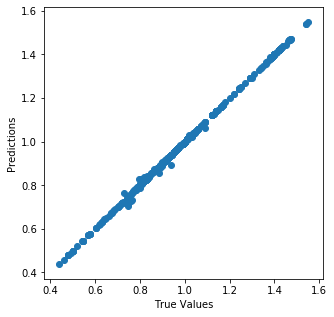

In [51]:
# Print the RMSE between the y test and the prediction
root_mean_squared_error = mean_squared_error(y_test, y_pred, squared=False)
# np.sqrt(mean_squared_error(y_test, y_pred)) can also be used
print('The root mean-squared-error (RMSE) score is %f'%(root_mean_squared_error))

# Plot test dependent variables vs predictions
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

### Result Analysis

<em>Nice</em> - Not only is the RMSE low, it seems that the predictions line up with the actual values that we were trying to predict for. Our model is excellent. 

But, if we think about it on a deeper level - there's actually a problem to the approach above. We randomly sampled data from different dates from the dataset. This means we aren't exactly doing it right since this is a time series data. 

<img src="https://github.com/wtmx/finance-uplevel/blob/master/AlternativetoTimeSeriesPrediction.png?raw=true">
Green - Train, Black - Test

For a dataset with time T, we should split it instead such that we train our model using data all the way to 0.8T, and use the model to predict the price from 0.8T onwards.

### Step 7: Split the data based on time and repeat the training

From the diagram, it's time to split the train data from Step 4 non-randomly.

To do so, <strong>slice</strong> the data such that:
1. Train data for X and y is the first 80%
2. Test data for X and y is the last 20%

These will be our new train and test datasets!

In [52]:
# Slice our DataFrame based on time

first80 = int(len(X)*0.8)
last20 = len(X) - first80

Xtrain = X.head(first80)
ytrain = y.head(first80)
Xtest = X.tail(last20)
ytest = y.tail(last20)

We'll retrain the model and make new prediction.

Then we'll assess the model performance again with RMSE and the scatter plot.

The root mean-squared-error (RMSE) score is 0.003848


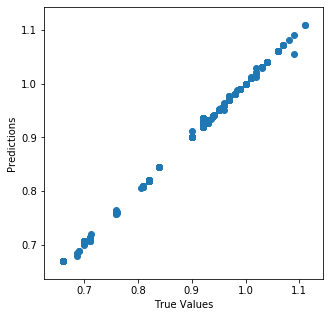

In [56]:
# Declare a variable to store our chosen model
rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)

# Fit our train dataset
rfr.fit(Xtrain, ytrain)

# Declare a variable and store our predictions using X test data
ypred = rfr.predict(Xtest)

# Print the RMSE between the y test and the prediction
rmse = mean_squared_error(ytest, ypred, squared=False)
print('The root mean-squared-error (RMSE) score is %f'%(rmse))

# Step 12e: Plot test dependent variables vs predictions
plt.figure(figsize=(5,5))
plt.scatter(ytest, ypred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

### Step 8: Plot the lineplot with the actual and predicted prices

On top of using RMSE and plotting the scatter plot between actual and predicted prices, we can also plot the time series data. 

We will overlay the prediction over the test data to see how agreeable those two are.

In [57]:
# Create a Series/DataFrame containing the prediction
# let the index be the same as the test data's DateTime

df_pred = pd.DataFrame(ypred, columns=['predicted_close'])
df_pred.index = Xtest.index
df_pred

predicted_close
2016-12-22            0.990
2016-12-23            0.990
2016-12-27            0.990
2016-12-28            0.990
2016-12-29            0.990
...                     ...
2018-12-20            0.671
2018-12-21            0.671
2018-12-24            0.671
2018-12-26            0.671
2018-12-27            0.671

[502 rows x 1 columns]

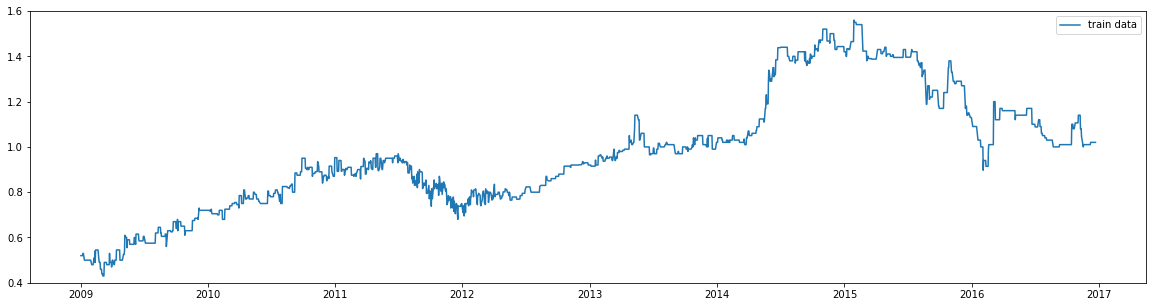

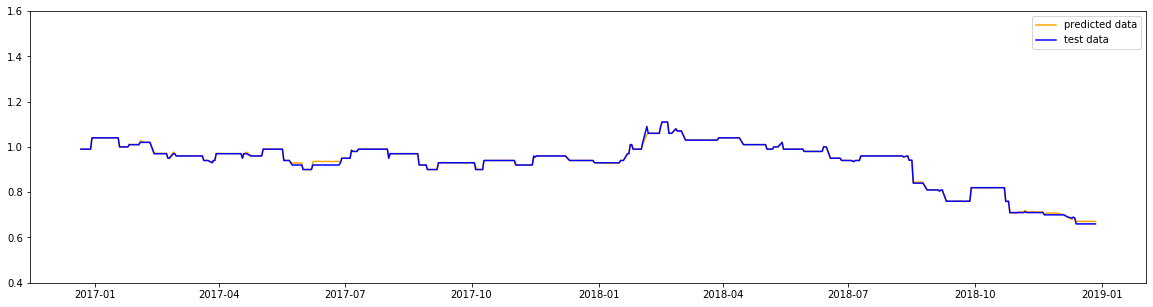

In [60]:
# Plot our close price from train data
x0 = ytrain.index.to_series()
y0 = ytrain

plt.figure(figsize=(20,5))
plt.plot(x0, y0, label  = 'train data')
plt.ylim(ymax = 1.6, ymin = 0.4)
plt.legend()
plt.show()

# Plot our close price from test data compared against our new prediction
x = ytest.index.to_series()
y1 = ypred
y2 = ytest

plt.figure(figsize=(20,5))
plt.plot(x, y1, color = 'orange', label  = 'predicted data')
plt.plot(x, y2, color = 'blue', label  = 'test data')
plt.ylim(ymax = 1.6, ymin = 0.4)
plt.legend()
plt.show()

## Conclusion

From our findings, it seems that splitting into train and time datasets non-randomly by time worked better for our model, as compared to splitting randomly. We were able to achieve a RMSE of 0.003848 via non-random datetime train-test split compared to RMSE of 0.005359 via random train-test split.

This seems logical as new closing prices tend to follow price action-related trends on preceding days, weeks or months. 

It is also interesting to note that from our analysis, the deviations between predicted and test data were less pronounced on earlier dates compared to later dates (especially during first half of 2017), which may suggest that the trained model is more effective in predicting closing prices that reside closer to the dates in our training dataset.

## Next Steps

While we have successfully implemented machine learning in predicting share prices, this does not mean we are going to get rich.

This is because whatever we learnt here is but a tip of the iceberg, and it's hard to say if our model is accurate since not all stocks behave the same way. 

Our model was trained on variables such as the opening price and trading volume each day. In reality, these variables are highly difficult to anticipate ahead of time.

For instance, one inaccurately predicted closing price would influence the next day's opening price and the inaccuracy in predictions could spiral out of control very quickly, especially over an extended period of time.

The method in which we've utilized trading volume is not meaningful as that can only be confirmed after the market closes, which by then the closing price is already known. So trading volume actually has to be predicted or inferred just like closing price, unless we are planning to use volume from prior training days.

Let's also not forget that not all stocks behave the same way.

However, it's not all doom and gloom. The silver lining is that we have witnessed the capabilities of Data Science in Finance, even using just rudimentary machine learning models.

In the future, when refining this project, we'd need more sophisticated models and lots more data. We would also have to test the same model on different types of stocks and over different time periods.